In [4]:
#Cnn detects patters between the data
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image


Using TensorFlow backend.


In [5]:
import keras
print(keras.__version__)

2.2.4


In [6]:
#Load the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [7]:
#Analyze the dataset
print('Training data {}:'.format(X_train.shape))
print('Testing data {}:'.format(X_test.shape))

#50000-training images
#10000-testing images
#32*32 pixel image
#3-RGB

Training data (50000, 32, 32, 3):
Testing data (10000, 32, 32, 3):


In [8]:
#For a single image
print(X_train[0].shape)

(32, 32, 3)


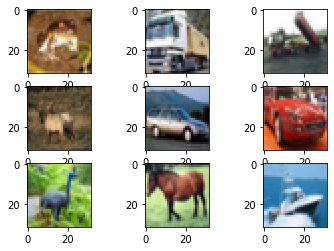

In [9]:
#Create a grid of 3*3 images
#330 means 3*3 and first position
for i in range(0,9):
    plt.subplot(330+1+i)
    img=X_train[i]
    plt.imshow(img)
    
#show the plot
plt.show()

    

In [11]:
#Preprocessing the dataset
#fix random seed for reproducibility
seed=6
np.random.seed(seed)

#load the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#normalize the data from 0-255 to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0


In [12]:
#Explore the class labels
print(y_train.shape)
print(y_train[0])
#class labels(image of a particular object) 
#there are 10(0-9) class labels


(50000, 1)
[6]


In [13]:
#Preprocessing the data
#now we define only one vector for all labels
#for example if the label is 6 the 6=[0 0 0 0 0 0 1 0 0 0] this is one hot vector of all the class labels
#when we convert an array into a vector it is known as one hot vector
#hot encode outputs
#np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.


# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])


(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
#Building the allCNN
#start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD
#SGD-Stochastic Gradient Descent
#optimizing-reducing errors




Buliding a Neural Network
A B C 
Input 32 × 32 RGB image 
3 × 3 conv. 96 ReLU
3 × 3 conv. 96 ReLU 
3 × 3 max-pooling stride 2 
3 × 3 conv. 192 ReLU 
3 × 3 conv. 192 ReLU
3 × 3 max-pooling stride 2 
3 × 3 conv. 192 ReLU 
1 × 1 conv. 192 ReLU 1 × 1 conv.
10 ReLU global averaging over 6 × 6 spatial dimensions 10 or 100-way softmax



In [15]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [16]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 10
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_____________________

In [ ]:

# define hyper parameters
#learning_rate = 0.01
#weight_decay = 1e-6
#momentum = 0.9

# build model and define weights

#weights='all_cnn_weights_0.9088_0.4994.hdf5'
#model = allcnn(weights)

# define optimizer and compile model
#sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
#print (model.summary())



# test the model with pretrained weights
#scores=model.evaluate(X_test,Y_test,verbose=1)
#print('Accuracy : {}'.format(scores[1]))


In [47]:
#The model is evaluating the test set so it requires less time and also we passed the pre trained weights which reduces the computation time

In [48]:
#Making a dictionary of class labels and names
classes=range(0,10)
names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

#zip the names and classes
class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [49]:
#Generate a batch of 9 imges to predict
batch=X_test[1000:1008]
labels=np.argmax(Y_test[1000:1010],axis=-1)

#Make predictions
predictions=model.predict(batch,verbose=1)

8/8 [==============================] - 0s 12ms/step


In [50]:
print(predictions)
#Softmax output

[[1.18955294e-25 5.63226368e-28 1.41568487e-14 7.83076393e-04
  7.56426839e-16 9.99216914e-01 4.78559351e-14 4.79050609e-18
  3.53305309e-25 6.42871467e-28]
 [3.14025339e-09 1.19988172e-10 1.09858155e-17 1.39152657e-17
  3.51663926e-18 7.89121292e-23 7.65014916e-15 6.46907002e-20
  1.00000000e+00 2.07865962e-16]
 [5.80810649e-07 1.46995844e-05 9.76074221e-10 6.32875453e-05
  5.96123373e-09 4.31912952e-07 1.72690576e-04 1.26877930e-09
  9.99748170e-01 4.88273919e-08]
 [5.38019233e-21 2.39289053e-20 4.96749011e-14 1.00700444e-08
  9.99999404e-01 6.16279692e-07 2.85672229e-14 9.03524217e-12
  2.61023159e-20 1.95037174e-18]
 [4.43160243e-05 7.30048705e-05 5.89621322e-07 9.94049376e-09
  1.06981785e-10 9.83270354e-10 9.09058523e-11 1.10003007e-10
  9.99881744e-01 3.44027058e-07]
 [2.76138556e-21 1.00000000e+00 4.00577395e-31 1.36803908e-28
  5.87717177e-31 2.25550760e-27 1.20871598e-25 1.36735911e-23
  3.44394464e-16 7.84914800e-09]
 [2.20539523e-34 1.00000000e+00 0.00000000e+00 1.40535157e

In [51]:
print(predictions.shape)

(8, 10)


In [52]:
#these are class probabailtites and they should sum to one
for image in predictions:
     print(np.sum(image))
    

1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
0.99999994


In [53]:
#use np.argmax function to convert class probabilities to class labels
class_results=np.argmax(predictions,axis=-1)
print(class_results)

[5 8 8 4 8 1 1 8]


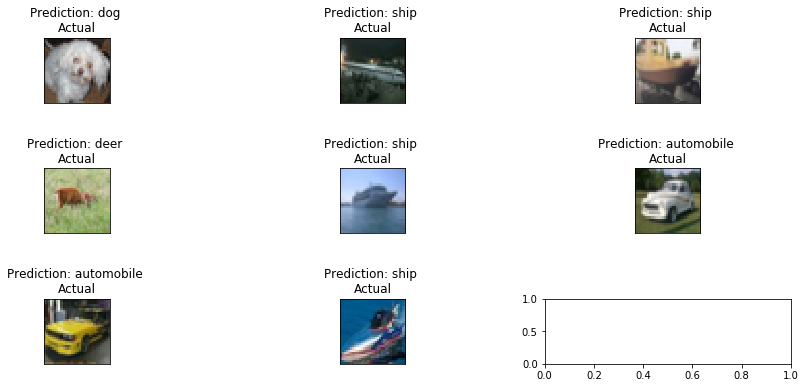

In [54]:
#Create a grid of 3*3 images
fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
    
    ##determine label for each prediction
    for key,value in class_labels.items():
        if class_results[i]==key:
            title='Prediction: {} \nActual'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
         #plot the image
        axs[i].imshow(img)
        
#Show the plot
plt.show()
    